<a href="https://colab.research.google.com/github/outfox330/ML_Models_on_Time_Series/blob/main/BTC_FORECAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 MB 6.5 MB/s eta 0:00:00


In [2]:
pip install skfolio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
pip install neuralforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.4/249.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.5 MB/s eta 0:00:00


In [3]:
! pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.3 MB/s eta 0:00:00


In [4]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=8e1fe1469c44fdd3f44c8970b8dfe9324cdeed0bcf5017fc3589b31f43c5786e
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [21]:
pip install yfinance

In [5]:
import pandas as pd
import numpy as np

from ray import tune

In [ ]:
from neuralforecast.auto import NHITS, BiTCN
from neuralforecast.core import NeuralForecast

import logging
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)

In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, RNN, NBEATS, PatchTST
from neuralforecast.models import TSMixer, iTransformer, TimesNet
from neuralforecast.auto import MLP, AutoMLP



In [ ]:
df = pd.read_csv('btc_price.csv')
df.head()

,open,high,low,close,date,daily_change
0,"64,342.23","64,489.71","62,849.56","62,880.66",8/26/24,-0.022583
1,64176.37,64996.42,63833.52,64333.54,8/25/24,0.002408
2,64103.87,64513.79,63619.92,64178.99,8/24/24,0.001321
3,60380.95,64947.06,60372.05,64094.36,8/23/24,0.061483
4,61168.32,61408.11,59815.25,60381.91,8/22/24,-0.012967


In [ ]:
df_change = df[['date','daily_change']]
df_change.columns = ['ds','y']
df_change['unique_id'] = 'test'
df_change['ds'] = pd.to_datetime(df_change['ds'])
df_change

<ipython-input-7-cb823e1729fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_change['unique_id'] = 'test'
<ipython-input-7-cb823e1729fc>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_change['ds'] = pd.to_datetime(df_change['ds'])
<ipython-input-7-cb823e1729fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_change['ds'] = pd.to_datetime(df_change['ds'])


,ds,y,unique_id
0,2024-08-26,-0.022583,test
1,2024-08-25,0.002408,test
2,2024-08-24,0.001321,test
3,2024-08-23,0.061483,test
4,2024-08-22,-0.012967,test
...,...,...,...
1373,2020-11-22,-0.014603,test
1374,2020-11-21,0.001123,test
1375,2020-11-20,0.045138,test
1376,2020-11-19,0.000735,test


In [ ]:
df_change = df_change.dropna(axis=0)
df_change

,ds,y,unique_id
0,2024-08-26,-0.022583,test
1,2024-08-25,0.002408,test
2,2024-08-24,0.001321,test
3,2024-08-23,0.061483,test
4,2024-08-22,-0.012967,test
...,...,...,...
1372,2020-11-23,-0.000320,test
1373,2020-11-22,-0.014603,test
1374,2020-11-21,0.001123,test
1375,2020-11-20,0.045138,test


In [ ]:
horizon =2
models = [NBEATS(input_size=15,h=horizon, max_steps=200, enable_checkpointing=True),
         NHITS(input_size=15,h=horizon, max_steps=200, enable_checkpointing=True),
          AutoMLP(config=dict(max_steps=200,
                              input_size=tune.choice([24]),
                              learning_rate=tune.choice([1e-3])),
                  h=horizon, num_samples=1),
          TSMixer(h=horizon, input_size=15, n_series=1, max_steps=200),
          iTransformer(h=horizon, input_size=15, n_series=1, max_steps=200),
          PatchTST(h=horizon, input_size=15, max_steps=200),
          TimesNet(h=horizon, input_size=15, max_steps=200)]

nf = NeuralForecast(models=models, freq='D')
nf.fit(df=df_change)
Y_hat_df = nf.predict().reset_index()
Y_hat_df

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2024-08-27 00:39:29,372	INFO worker.py:1781 -- Started a local Ray instance.
2024-08-27 00:39:31,700	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2024-08-27_00-39-26   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 1                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2024-08-27_00-39-26
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-08-27_00-39-26_237659_1092/artifacts/2024-08-27_00-39-31/_train_tune_2024-08-27_00-39-26/driver_artifacts`


(_train_tune pid=2373) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(_train_tune pid=2373)   return torch.load(i

Epoch 99:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.021, train_loss_epoch=0.021]


/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  8.12it/s, v_num=0, train_loss_step=0.0215, train_loss_epoch=0.021]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 197:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0181, train_loss_epoch=0.0181, valid_loss=0.0212]


2024-08-27 00:40:19,041	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2024-08-27_00-39-26' in 0.0065s.


Epoch 199:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.0191, train_loss_epoch=0.0191, valid_loss=0.0212]


(_train_tune pid=2373) `Trainer.fit` stopped: `max_steps=200` reached.
INFO:lightning_fabric.utilities.seed:Seed set to 1


Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  8.06it/s, v_num=0, train_loss_step=0.0173, train_loss_epoch=0.0191, valid_loss=0.0212]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  7.00it/s, v_num=0, train_loss_step=0.0173, train_loss_epoch=0.0173, valid_loss=0.0291]



Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,unique_id,ds,NBEATS,NHITS,AutoMLP,TSMixer,iTransformer,PatchTST,TimesNet
0,test,2024-08-27,0.002391,0.001820,0.000675,-0.000256,0.004279,0.007691,0.001042
1,test,2024-08-28,0.000108,-0.000811,-0.001025,0.003949,0.003125,0.004376,0.001623


In [ ]:
Y_hat_df.to_csv('daily_change_output.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

# New Section

In [73]:
df1 = pd.read_csv('bitcoin.csv')
df1.head()

,close,date
0,62880.65865,8/26/24
1,64333.54418,8/25/24
2,64178.99065,8/24/24
3,64094.35721,8/23/24
4,60381.91246,8/22/24


In [74]:
df2 = pd.read_csv('bnb.csv')
df2.head()

,close,date
0,548.828031,8/26/24
1,574.249965,8/25/24
2,580.762177,8/24/24
3,591.806050,8/23/24
4,583.051855,8/22/24


In [75]:
df3 = pd.read_csv('dogecoin.csv')
df3.head()

,close,date
0,0.105292,8/26/24
1,0.109698,8/25/24
2,0.112631,8/24/24
3,0.112927,8/23/24
4,0.105308,8/22/24


In [76]:
df4 = pd.read_csv('eth.csv')
df4.head()

,close,date
0,2681.340514,8/26/24
1,2749.157667,8/25/24
2,2769.389732,8/24/24
3,2764.447103,8/23/24
4,2622.951355,8/22/24


In [77]:
df5 = pd.read_csv('solana.csv')
df5.head()

,close,date
0,157.236879,8/26/24
1,158.909125,8/25/24
2,160.731744,8/24/24
3,153.107085,8/23/24
4,143.257930,8/22/24


In [78]:
df6 = pd.read_csv('shiba.csv')
df6.head()

,close,date
0,0.000015,8/26/24
1,0.000015,8/25/24
2,0.000016,8/24/24
3,0.000015,8/23/24
4,0.000014,8/22/24


In [79]:
df_total = df1
df_total = df_total[['date','close']]
df_total.columns = ['date','bitcoin']
df_total

,date,bitcoin
0,8/26/24,62880.65865
1,8/25/24,64333.54418
2,8/24/24,64178.99065
3,8/23/24,64094.35721
4,8/22/24,60381.91246
...,...,...
951,1/18/22,42375.63284
952,1/17/22,42250.54937
953,1/16/22,43113.88011
954,1/15/22,43177.39679


In [80]:
df_total['bnb'] = df2['close']
df_total['dogecoin'] = df3['close']
df_total['eth'] = df4['close']
df_total['solana'] = df5['close']
df_total['shiba'] = df6['close']
df_total

<ipython-input-80-1ab4c03d3e5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['bnb'] = df2['close']
<ipython-input-80-1ab4c03d3e5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['dogecoin'] = df3['close']
<ipython-input-80-1ab4c03d3e5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,date,bitcoin,bnb,dogecoin,eth,solana,shiba
0,8/26/24,62880.65865,548.828031,0.105292,2681.340514,157.236879,0.000015
1,8/25/24,64333.54418,574.249965,0.109698,2749.157667,158.909125,0.000015
2,8/24/24,64178.99065,580.762177,0.112631,2769.389732,160.731744,0.000016
3,8/23/24,64094.35721,591.806050,0.112927,2764.447103,153.107085,0.000015
4,8/22/24,60381.91246,583.051855,0.105308,2622.951355,143.257930,0.000014
...,...,...,...,...,...,...,...
951,1/18/22,42375.63284,472.005051,0.165485,3164.025254,141.587192,0.000028
952,1/17/22,42250.54937,475.709867,0.171145,3212.304897,139.926008,0.000029
953,1/16/22,43113.88011,498.427925,0.177176,3350.921969,147.856514,0.000030
954,1/15/22,43177.39679,494.988068,0.185103,3330.530846,147.801178,0.000031


In [81]:
df_total['date'] = pd.to_datetime(df_total['date'])

<ipython-input-81-8e756b067241>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_total['date'] = pd.to_datetime(df_total['date'])
<ipython-input-81-8e756b067241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['date'] = pd.to_datetime(df_total['date'])


In [82]:
df_total = df_total.sort_values('date')
df_total

,date,bitcoin,bnb,dogecoin,eth,solana,shiba
955,2022-01-14,43099.69983,489.867424,0.183549,3310.001423,146.159033,0.000031
954,2022-01-15,43177.39679,494.988068,0.185103,3330.530846,147.801178,0.000031
953,2022-01-16,43113.88011,498.427925,0.177176,3350.921969,147.856514,0.000030
952,2022-01-17,42250.54937,475.709867,0.171145,3212.304897,139.926008,0.000029
951,2022-01-18,42375.63284,472.005051,0.165485,3164.025254,141.587192,0.000028
...,...,...,...,...,...,...,...
4,2024-08-22,60381.91246,583.051855,0.105308,2622.951355,143.257930,0.000014
3,2024-08-23,64094.35721,591.806050,0.112927,2764.447103,153.107085,0.000015
2,2024-08-24,64178.99065,580.762177,0.112631,2769.389732,160.731744,0.000016
1,2024-08-25,64333.54418,574.249965,0.109698,2749.157667,158.909125,0.000015


In [83]:
eur = pd.read_csv('EURUSD.csv')
eur.columns = ['date','eur_usd']
eur['date'] = pd.to_datetime(eur['date'])
eur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     684 non-null    datetime64[ns]
 1   eur_usd  684 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.8 KB


<ipython-input-83-a44862e86a7c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  eur['date'] = pd.to_datetime(eur['date'])


In [84]:
jpy = pd.read_csv('USDJPY.csv')
jpy.columns = ['date','usd_jpy']
jpy['date'] = pd.to_datetime(jpy['date'])
jpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     683 non-null    datetime64[ns]
 1   usd_jpy  683 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.8 KB


<ipython-input-84-0c1ba8773bb9>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  jpy['date'] = pd.to_datetime(jpy['date'])


In [85]:
df_total = pd.merge(df_total, eur, on = 'date', how='left')
df_total = pd.merge(df_total, jpy, on = 'date', how='left')
df_total



,date,bitcoin,bnb,dogecoin,eth,solana,shiba,eur_usd,usd_jpy
0,2022-01-14,43099.69983,489.867424,0.183549,3310.001423,146.159033,0.000031,1.145712,114.117996
1,2022-01-15,43177.39679,494.988068,0.185103,3330.530846,147.801178,0.000031,NaN,NaN
2,2022-01-16,43113.88011,498.427925,0.177176,3350.921969,147.856514,0.000030,NaN,NaN
3,2022-01-17,42250.54937,475.709867,0.171145,3212.304897,139.926008,0.000029,1.141070,114.306000
4,2022-01-18,42375.63284,472.005051,0.165485,3164.025254,141.587192,0.000028,1.141057,114.570999
...,...,...,...,...,...,...,...,...,...
951,2024-08-22,60381.91246,583.051855,0.105308,2622.951355,143.257930,0.000014,1.115536,145.117996
952,2024-08-23,64094.35721,591.806050,0.112927,2764.447103,153.107085,0.000015,1.111716,146.201996
953,2024-08-24,64178.99065,580.762177,0.112631,2769.389732,160.731744,0.000016,NaN,NaN
954,2024-08-25,64333.54418,574.249965,0.109698,2749.157667,158.909125,0.000015,NaN,NaN


In [86]:
df_total['dayofweek'] = df_total['date'].dt.dayofweek
df_total

,date,bitcoin,bnb,dogecoin,eth,solana,shiba,eur_usd,usd_jpy,dayofweek
0,2022-01-14,43099.69983,489.867424,0.183549,3310.001423,146.159033,0.000031,1.145712,114.117996,4
1,2022-01-15,43177.39679,494.988068,0.185103,3330.530846,147.801178,0.000031,NaN,NaN,5
2,2022-01-16,43113.88011,498.427925,0.177176,3350.921969,147.856514,0.000030,NaN,NaN,6
3,2022-01-17,42250.54937,475.709867,0.171145,3212.304897,139.926008,0.000029,1.141070,114.306000,0
4,2022-01-18,42375.63284,472.005051,0.165485,3164.025254,141.587192,0.000028,1.141057,114.570999,1
...,...,...,...,...,...,...,...,...,...,...
951,2024-08-22,60381.91246,583.051855,0.105308,2622.951355,143.257930,0.000014,1.115536,145.117996,3
952,2024-08-23,64094.35721,591.806050,0.112927,2764.447103,153.107085,0.000015,1.111716,146.201996,4
953,2024-08-24,64178.99065,580.762177,0.112631,2769.389732,160.731744,0.000016,NaN,NaN,5
954,2024-08-25,64333.54418,574.249965,0.109698,2749.157667,158.909125,0.000015,NaN,NaN,6


In [87]:
df_total = df_total.loc[df_total.dayofweek==4]
df_total

,date,bitcoin,bnb,dogecoin,eth,solana,shiba,eur_usd,usd_jpy,dayofweek
0,2022-01-14,43099.69983,489.867424,0.183549,3310.001423,146.159033,0.000031,1.145712,114.117996,4
7,2022-01-21,36457.31810,383.073926,0.142640,2557.931623,111.966060,0.000022,1.131375,113.992996,4
14,2022-01-28,37784.33326,386.084392,0.141656,2547.091978,91.312893,0.000021,1.114703,115.351997,4
21,2022-02-04,41500.87538,399.029607,0.147503,2983.586995,112.174249,0.000022,1.143576,114.957001,4
28,2022-02-11,42407.93794,400.422400,0.144847,2927.383633,96.381880,0.000029,1.141553,116.046997,4
...,...,...,...,...,...,...,...,...,...,...
924,2024-07-26,67912.06310,581.077923,0.134318,3275.951424,183.136714,0.000017,1.085128,153.697006,4
931,2024-08-02,61415.06457,542.915190,0.111508,2986.013153,152.638227,0.000015,1.078760,149.201004,4
938,2024-08-09,60880.11220,509.182707,0.103974,2599.598584,156.457221,0.000014,1.091572,147.669006,4
945,2024-08-16,58894.10416,519.968635,0.100439,2593.186443,139.330564,0.000013,1.097273,149.222000,4


In [88]:
import yfinance as yf
yf_data = yf.download("SPY AAPL MSFT AMD", start="2022-01-14", end="2024-08-26")['Close']
yf_data = yf_data.reset_index()
yf_data.columns = ['date','spy','aapl','msft','amd']
yf_data['date'] = pd.to_datetime(yf_data['date'])
yf_data = yf_data.sort_values('date')
yf_data['dayofweek'] = yf_data['date'].dt.dayofweek
yf_data = yf_data.loc[yf_data.dayofweek==4]
yf_data['date'] = yf_data['date'].dt.tz_convert(None)
yf_data

[*********************100%***********************]  4 of 4 completed


,date,spy,aapl,msft,amd,dayofweek
0,2022-01-14,173.070007,136.880005,310.200012,464.720001,4
4,2022-01-21,162.410004,118.809998,296.029999,437.980011,4
9,2022-01-28,170.330002,105.239998,308.260010,441.950012,4
14,2022-02-04,172.389999,123.599998,305.940002,448.700012,4
19,2022-02-11,168.639999,113.180000,295.040009,440.459991,4
...,...,...,...,...,...,...
634,2024-07-26,217.960007,139.990005,425.269989,544.440002,4
639,2024-08-02,219.860001,132.500000,408.489990,532.900024,4
644,2024-08-09,216.240005,134.270004,406.019989,532.989990,4
649,2024-08-16,226.050003,148.559998,418.470001,554.309998,4


In [89]:
df_total = pd.merge(df_total, yf_data, on = 'date', how='left')
df_total

,date,bitcoin,bnb,dogecoin,eth,solana,shiba,eur_usd,usd_jpy,dayofweek_x,spy,aapl,msft,amd,dayofweek_y
0,2022-01-14,43099.69983,489.867424,0.183549,3310.001423,146.159033,0.000031,1.145712,114.117996,4,173.070007,136.880005,310.200012,464.720001,4.0
1,2022-01-21,36457.31810,383.073926,0.142640,2557.931623,111.966060,0.000022,1.131375,113.992996,4,162.410004,118.809998,296.029999,437.980011,4.0
2,2022-01-28,37784.33326,386.084392,0.141656,2547.091978,91.312893,0.000021,1.114703,115.351997,4,170.330002,105.239998,308.260010,441.950012,4.0
3,2022-02-04,41500.87538,399.029607,0.147503,2983.586995,112.174249,0.000022,1.143576,114.957001,4,172.389999,123.599998,305.940002,448.700012,4.0
4,2022-02-11,42407.93794,400.422400,0.144847,2927.383633,96.381880,0.000029,1.141553,116.046997,4,168.639999,113.180000,295.040009,440.459991,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2024-07-26,67912.06310,581.077923,0.134318,3275.951424,183.136714,0.000017,1.085128,153.697006,4,217.960007,139.990005,425.269989,544.440002,4.0
133,2024-08-02,61415.06457,542.915190,0.111508,2986.013153,152.638227,0.000015,1.078760,149.201004,4,219.860001,132.500000,408.489990,532.900024,4.0
134,2024-08-09,60880.11220,509.182707,0.103974,2599.598584,156.457221,0.000014,1.091572,147.669006,4,216.240005,134.270004,406.019989,532.989990,4.0
135,2024-08-16,58894.10416,519.968635,0.100439,2593.186443,139.330564,0.000013,1.097273,149.222000,4,226.050003,148.559998,418.470001,554.309998,4.0


In [90]:
df_total['bitcoin_return'] = df_total['bitcoin'].pct_change()
df_total['bnb_return'] = df_total['bnb'].pct_change()
df_total['dogecoin_return'] = df_total['dogecoin'].pct_change()
df_total['eth_return'] = df_total['eth'].pct_change()
df_total['solana_return'] = df_total['solana'].pct_change()
df_total['eur_usd_return'] = df_total['eur_usd'].pct_change()
df_total['usd_jpy_return'] = df_total['usd_jpy'].pct_change()
df_total['spy_return'] = df_total['spy'].pct_change()
df_total['aapl_return'] = df_total['aapl'].pct_change()
df_total['msft_return'] = df_total['msft'].pct_change()
df_total['amd_return'] = df_total['amd'].pct_change()
df_total



<ipython-input-90-6122177d5e9e>:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_total['spy_return'] = df_total['spy'].pct_change()
<ipython-input-90-6122177d5e9e>:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_total['aapl_return'] = df_total['aapl'].pct_change()
<ipython-input-90-6122177d5e9e>:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_total['msft_return'] = df_total['msft'].pct_ch

,date,bitcoin,bnb,dogecoin,eth,solana,shiba,eur_usd,usd_jpy,dayofweek_x,...,bnb_return,dogecoin_return,eth_return,solana_return,eur_usd_return,usd_jpy_return,spy_return,aapl_return,msft_return,amd_return
0,2022-01-14,43099.69983,489.867424,0.183549,3310.001423,146.159033,0.000031,1.145712,114.117996,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-21,36457.31810,383.073926,0.142640,2557.931623,111.966060,0.000022,1.131375,113.992996,4,...,-0.218005,-0.222875,-0.227211,-0.233944,-0.012514,-0.001095,-0.061594,-0.132013,-0.045680,-0.057540
2,2022-01-28,37784.33326,386.084392,0.141656,2547.091978,91.312893,0.000021,1.114703,115.351997,4,...,0.007859,-0.006898,-0.004238,-0.184459,-0.014736,0.011922,0.048765,-0.114216,0.041313,0.009064
3,2022-02-04,41500.87538,399.029607,0.147503,2983.586995,112.174249,0.000022,1.143576,114.957001,4,...,0.033529,0.041274,0.171370,0.228460,0.025902,-0.003424,0.012094,0.174458,-0.007526,0.015273
4,2022-02-11,42407.93794,400.422400,0.144847,2927.383633,96.381880,0.000029,1.141553,116.046997,4,...,0.003490,-0.018006,-0.018838,-0.140784,-0.001769,0.009482,-0.021753,-0.084304,-0.035628,-0.018364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2024-07-26,67912.06310,581.077923,0.134318,3275.951424,183.136714,0.000017,1.085128,153.697006,4,...,-0.021264,0.070430,-0.065545,0.082459,-0.004612,-0.021973,-0.028309,-0.076461,-0.027087,-0.008288
133,2024-08-02,61415.06457,542.915190,0.111508,2986.013153,152.638227,0.000015,1.078760,149.201004,4,...,-0.065676,-0.169820,-0.088505,-0.166534,-0.005868,-0.029252,0.008717,-0.053504,-0.039457,-0.021196
134,2024-08-09,60880.11220,509.182707,0.103974,2599.598584,156.457221,0.000014,1.091572,147.669006,4,...,-0.062132,-0.067569,-0.129408,0.025020,0.011877,-0.010268,-0.016465,0.013359,-0.006047,0.000169
135,2024-08-16,58894.10416,519.968635,0.100439,2593.186443,139.330564,0.000013,1.097273,149.222000,4,...,0.021183,-0.033994,-0.002467,-0.109465,0.005223,0.010517,0.045366,0.106427,0.030664,0.040001


In [91]:
df_total = df_total.dropna(axis=0)
df_total

,date,bitcoin,bnb,dogecoin,eth,solana,shiba,eur_usd,usd_jpy,dayofweek_x,...,bnb_return,dogecoin_return,eth_return,solana_return,eur_usd_return,usd_jpy_return,spy_return,aapl_return,msft_return,amd_return
1,2022-01-21,36457.31810,383.073926,0.142640,2557.931623,111.966060,0.000022,1.131375,113.992996,4,...,-0.218005,-0.222875,-0.227211,-0.233944,-0.012514,-0.001095,-0.061594,-0.132013,-0.045680,-0.057540
2,2022-01-28,37784.33326,386.084392,0.141656,2547.091978,91.312893,0.000021,1.114703,115.351997,4,...,0.007859,-0.006898,-0.004238,-0.184459,-0.014736,0.011922,0.048765,-0.114216,0.041313,0.009064
3,2022-02-04,41500.87538,399.029607,0.147503,2983.586995,112.174249,0.000022,1.143576,114.957001,4,...,0.033529,0.041274,0.171370,0.228460,0.025902,-0.003424,0.012094,0.174458,-0.007526,0.015273
4,2022-02-11,42407.93794,400.422400,0.144847,2927.383633,96.381880,0.000029,1.141553,116.046997,4,...,0.003490,-0.018006,-0.018838,-0.140784,-0.001769,0.009482,-0.021753,-0.084304,-0.035628,-0.018364
5,2022-02-18,40030.97560,399.569176,0.138768,2785.727491,90.065461,0.000028,1.136648,114.865997,4,...,-0.002131,-0.041969,-0.048390,-0.065535,-0.004297,-0.010177,-0.007946,0.005743,-0.024098,-0.014144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2024-07-26,67912.06310,581.077923,0.134318,3275.951424,183.136714,0.000017,1.085128,153.697006,4,...,-0.021264,0.070430,-0.065545,0.082459,-0.004612,-0.021973,-0.028309,-0.076461,-0.027087,-0.008288
133,2024-08-02,61415.06457,542.915190,0.111508,2986.013153,152.638227,0.000015,1.078760,149.201004,4,...,-0.065676,-0.169820,-0.088505,-0.166534,-0.005868,-0.029252,0.008717,-0.053504,-0.039457,-0.021196
134,2024-08-09,60880.11220,509.182707,0.103974,2599.598584,156.457221,0.000014,1.091572,147.669006,4,...,-0.062132,-0.067569,-0.129408,0.025020,0.011877,-0.010268,-0.016465,0.013359,-0.006047,0.000169
135,2024-08-16,58894.10416,519.968635,0.100439,2593.186443,139.330564,0.000013,1.097273,149.222000,4,...,0.021183,-0.033994,-0.002467,-0.109465,0.005223,0.010517,0.045366,0.106427,0.030664,0.040001


In [92]:
import statsmodels.api as sm

y = df_total['bitcoin_return']

X = df_total[['bnb_return','dogecoin_return', 'eth_return', 'solana_return',
              'eur_usd_return','usd_jpy_return','spy_return','aapl_return','msft_return','amd_return']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         bitcoin_return   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     50.96
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           8.08e-39
Time:                        16:53:01   Log-Likelihood:                 257.87
No. Observations:                 133   AIC:                            -493.7
Df Residuals:                     122   BIC:                            -461.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0030      0.003     

In [93]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', max_depth=10)

xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)




In [94]:
rmse = mean_squared_error(y_test, preds, squared=False)
rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.03414440595777403

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

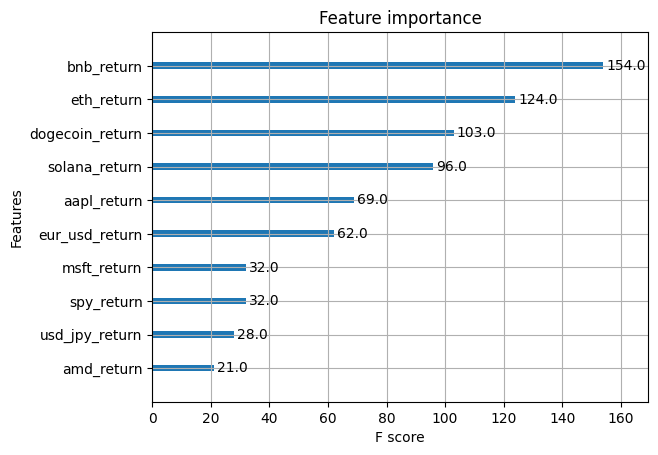

In [95]:
xgb.plot_importance(xg_reg)

<Axes: >

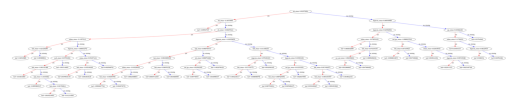

In [96]:
from xgboost import plot_tree
plot_tree(xg_reg._Booster)

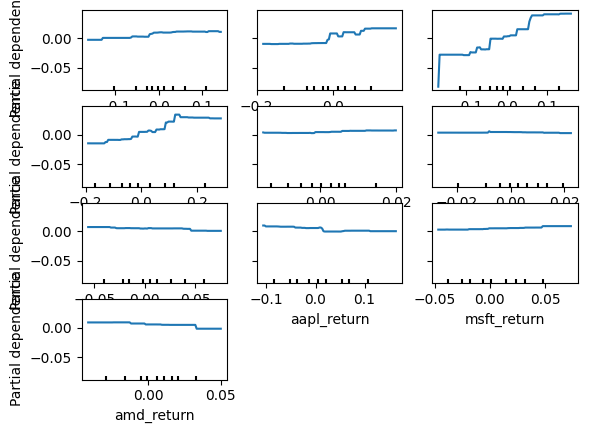

In [97]:
# from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = ['bnb_return','dogecoin_return', 'eth_return', 'solana_return','eur_usd_return','usd_jpy_return']

PartialDependenceDisplay.from_estimator(xg_reg, X_train,
                                                [1, 2,3,4,5,6,7,8,9,10])


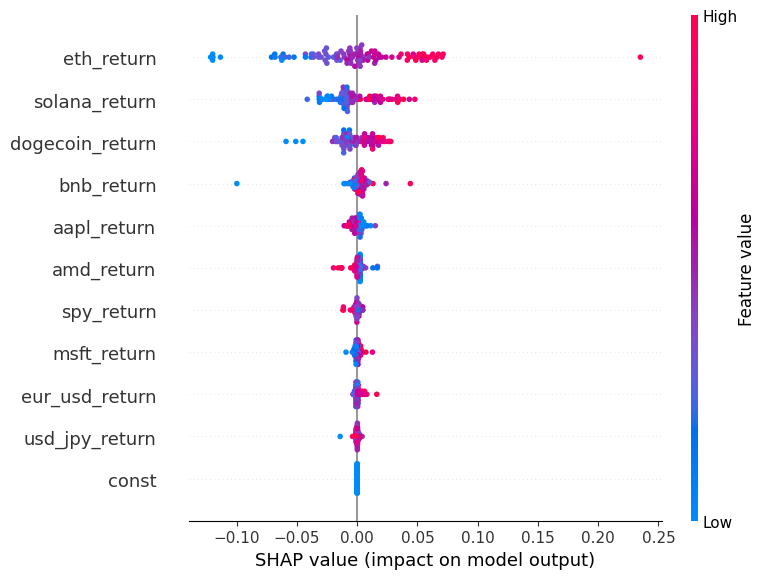

In [98]:
import shap

explainer = shap.Explainer(xg_reg)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)

In [99]:
import numpy as np

def sensitivity_analysis(model, X, feature, values):
  original_values = X[feature].copy()
  predictions = {}
  for val in values:
    X[feature] = val
    predictions[val] = model.predict(X)

  X[feature] = original_values
  return predictions


In [100]:
X_test.head()

,const,bnb_return,dogecoin_return,eth_return,solana_return,eur_usd_return,usd_jpy_return,spy_return,aapl_return,msft_return,amd_return
53,1.0,0.038267,0.023271,0.143385,0.396962,-0.002427,-0.006209,0.023078,-0.013099,0.004138,-0.006575
72,1.0,0.001751,0.022935,0.042963,0.097622,0.003389,-0.009063,0.031466,-0.072188,0.007540,0.018809
33,1.0,-0.007804,-0.030471,0.046053,-0.015710,-0.001900,0.025761,-0.047733,-0.119982,-0.044873,-0.032247
44,1.0,-0.054864,-0.002505,-0.058204,-0.188602,0.016631,-0.009327,0.010621,0.016581,-0.023836,-0.006223
121,1.0,-0.002365,-0.014470,-0.062429,0.017002,0.004853,0.015316,-0.001800,0.008765,0.019869,0.018678


In [101]:
values_to_test = np.linspace(X_test['eth_return'].min(), X_test['eth_return'].max(),100)
preds = sensitivity_analysis(xg_reg, X_test, 'eth_return', values_to_test)

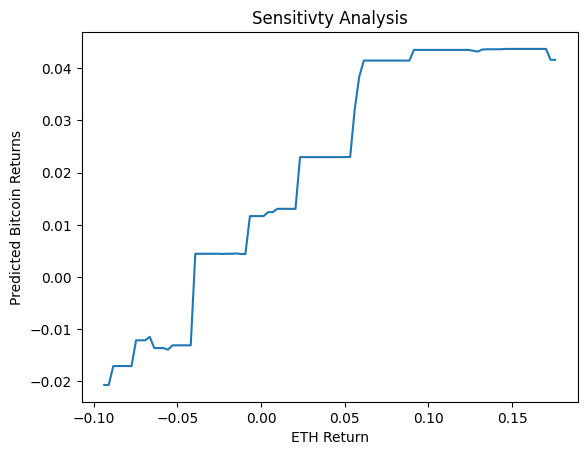

In [102]:
plt.plot(values_to_test, [np.mean(pred) for pred in preds.values()])
plt.xlabel('ETH Return')
plt.ylabel('Predicted Bitcoin Returns')
plt.title('Sensitivty Analysis')
plt.show()

In [103]:
# Factor Analysis

In [109]:
X2= X.drop(['const'],axis=1)
X2 = X2.dropna(axis=0)
X2

,bnb_return,dogecoin_return,eth_return,solana_return,eur_usd_return,usd_jpy_return,spy_return,aapl_return,msft_return,amd_return
1,-0.218005,-0.222875,-0.227211,-0.233944,-0.012514,-0.001095,-0.061594,-0.132013,-0.045680,-0.057540
2,0.007859,-0.006898,-0.004238,-0.184459,-0.014736,0.011922,0.048765,-0.114216,0.041313,0.009064
3,0.033529,0.041274,0.171370,0.228460,0.025902,-0.003424,0.012094,0.174458,-0.007526,0.015273
4,0.003490,-0.018006,-0.018838,-0.140784,-0.001769,0.009482,-0.021753,-0.084304,-0.035628,-0.018364
5,-0.002131,-0.041969,-0.048390,-0.065535,-0.004297,-0.010177,-0.007946,0.005743,-0.024098,-0.014144
...,...,...,...,...,...,...,...,...,...,...
132,-0.021264,0.070430,-0.065545,0.082459,-0.004612,-0.021973,-0.028309,-0.076461,-0.027087,-0.008288
133,-0.065676,-0.169820,-0.088505,-0.166534,-0.005868,-0.029252,0.008717,-0.053504,-0.039457,-0.021196
134,-0.062132,-0.067569,-0.129408,0.025020,0.011877,-0.010268,-0.016465,0.013359,-0.006047,0.000169
135,0.021183,-0.033994,-0.002467,-0.109465,0.005223,0.010517,0.045366,0.106427,0.030664,0.040001


In [111]:
X2.describe()

,bnb_return,dogecoin_return,eth_return,solana_return,eur_usd_return,usd_jpy_return,spy_return,aapl_return,msft_return,amd_return
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.004350,-0.000155,0.003086,0.012096,-0.000096,0.001950,0.002761,0.003661,0.002878,0.001734
std,0.083388,0.120829,0.095420,0.152492,0.011333,0.015169,0.038210,0.074534,0.036557,0.024700
min,-0.245257,-0.327804,-0.347452,-0.516686,-0.030547,-0.044874,-0.111468,-0.165354,-0.077247,-0.061416
25%,-0.035002,-0.056162,-0.053311,-0.071734,-0.007124,-0.006644,-0.021019,-0.048398,-0.024098,-0.012747
50%,-0.002071,-0.010975,-0.004823,-0.012868,-0.000827,0.002818,0.001476,0.003246,0.000837,0.003505
75%,0.045375,0.041274,0.054186,0.097622,0.005415,0.011922,0.026104,0.056481,0.023783,0.016442
max,0.296477,0.652848,0.254224,0.433305,0.045396,0.034637,0.087579,0.200435,0.124060,0.066200


[4.08141747 2.24604945 1.23966342 0.55059538 0.51625525 0.38672674
 0.31422127 0.27297207 0.23666811 0.15543083]


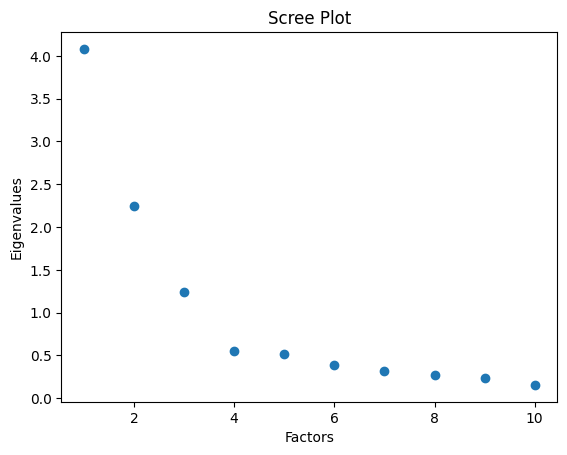

In [113]:
# Factor Extraction

from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X2)
df_scaled = pd.DataFrame(scaled_data, columns=X2.columns)

fa= FactorAnalyzer(n_factors=10, rotation='varimax')
fa.fit(df_scaled)

ev, v = fa.get_eigenvalues()
print(ev)

import matplotlib.pyplot as plt
plt.scatter(range(1, df_scaled.shape[1]+1), ev)
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()

In [116]:
# Factor Rotation

n_factors = 5
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df_scaled)

loadings = fa.loadings_
print(loadings)

loadings_df = pd.DataFrame(loadings, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'], index=X2.columns)
print(loadings_df)

[[ 0.81152929  0.10252802 -0.05325522  0.02635936  0.09928882]
 [ 0.78684154  0.03066631 -0.04162486 -0.02318077  0.07573812]
 [ 0.85439362  0.20354925  0.04060892  0.08126333  0.10561586]
 [ 0.80341004  0.09972812 -0.03135382  0.05376836 -0.0614971 ]
 [ 0.06472974  0.24379434 -0.26269335  0.92533306  0.08393446]
 [-0.05227008 -0.08137831  0.96571836 -0.2264031  -0.04606211]
 [ 0.0798027   0.85006588 -0.08591647  0.04249303  0.01155105]
 [ 0.17796104  0.53168578 -0.07768111  0.12267613  0.68325787]
 [ 0.09078434  0.79867185 -0.02236107  0.09845332  0.17292546]
 [ 0.20811059  0.86494669 -0.01500006  0.19997511  0.16815016]]
                 Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
bnb_return       0.811529  0.102528 -0.053255  0.026359  0.099289
dogecoin_return  0.786842  0.030666 -0.041625 -0.023181  0.075738
eth_return       0.854394  0.203549  0.040609  0.081263  0.105616
solana_return    0.803410  0.099728 -0.031354  0.053768 -0.061497
eur_usd_return   0.064730  0.243794 -0.

In [117]:
communalities = fa.get_communalities()
communalities_df = pd.DataFrame(communalities, index=X2.columns, columns=['Communalities'])
print(communalities_df)

                 Communalities
bnb_return            0.682481
dogecoin_return       0.628066
eth_return            0.790828
solana_return         0.663069
eur_usd_return        0.995920
usd_jpy_return        0.995347
spy_return            0.738301
aapl_return           0.802285
msft_return           0.686215
amd_return            0.859932


In [120]:
import requests
import pandas as pd
import numpy as np

from skfolio import PerfMeasure, RatioMeasure, RiskMeasure, Population
from skfolio.optimization import (
    MeanRisk,
    ObjectiveFunction,
)
from skfolio.preprocessing import prices_to_returns

# plotting
from plotly.io import show
import seaborn as sns
import matplotlib.pyplot as plt

# settings
plt.style.use("seaborn-v0_8-colorblind")
plt.rcParams["figure.figsize"] = (16, 8)

In [122]:
model = MeanRisk(
    objective_function=ObjectiveFunction.MINIMIZE_RISK,
    risk_measure=RiskMeasure.VARIANCE,
    portfolio_params=dict(name="Min Variance"),
)
model.fit(X2)
min_variance_pred = model.predict(X2)

In [123]:
model = MeanRisk(
    objective_function=ObjectiveFunction.MAXIMIZE_RETURN,
    portfolio_params=dict(name="Max Return"),

)
model.fit(X2)
max_return_pred = model.predict(X2)

In [124]:
model = MeanRisk(
    objective_function=ObjectiveFunction.MAXIMIZE_RATIO,
    risk_measure=RiskMeasure.VARIANCE,
    portfolio_params=dict(name="Max Sharpe"),
)
model.fit(X2)
max_sharpe_pred = model.predict(X2)

In [125]:
population = Population([min_variance_pred, max_return_pred, max_sharpe_pred])
population.plot_composition()

In [126]:
population.plot_cumulative_returns()

In [128]:
model = MeanRisk(
    efficient_frontier_size=50,
)
model.fit(X2)
efficient_frontier = model.predict(X2)


fig = efficient_frontier.plot_measures(
    x=RiskMeasure.ANNUALIZED_VARIANCE,
    y=PerfMeasure.ANNUALIZED_MEAN,
    color_scale=RatioMeasure.ANNUALIZED_SHARPE_RATIO,
    hover_measures=[
        RiskMeasure.MAX_DRAWDOWN,
        RatioMeasure.ANNUALIZED_SORTINO_RATIO,
        RiskMeasure.WORST_REALIZATION],

)
show(fig)


In [129]:
efficient_frontier.plot_composition()